### Find your API Key at https://quantum-computing.ibm.com/

### Follow the eBook at https://qiskit.org/textbook/preface.html

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
# Simulate 3 qubits

qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [3]:
# Let's see the result of simulating the tensor product statevector of these three qubits
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

In [9]:
qc = QuantumCircuit(2)
qc.x(1)
# See the circuit:
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘

In [10]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using array_to_latex.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

In [11]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [13]:
# Use the unitary simulator to simulate complex mulitbit statevectors

usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

In [15]:
qc = QuantumCircuit(1)
qc.x(0)
qc.z(0)
qc.h(0)
qc.draw()

┌───┐┌───┐┌───┐
q_0: ┤ X ├┤ Z ├┤ H ├
     └───┘└───┘└───┘

In [16]:
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

### Two-Bit Gates
CNOT

In [17]:
# CNOT Gate: One bits performs a conditional operation on a second bit

qc = QuantumCircuit(2)
# Apply CNOT - 0 is the control and 1 is the target
qc.cx(0,1)
# See the circuit:
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [21]:
# CNOT has one of two unitary matrices

qc = QuantumCircuit(2)
qc.cx(0,1)
unitary = usim.run(assemble(qc)).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

qc = QuantumCircuit(2)
qc.cx(1,0)
unitary = usim.run(assemble(qc)).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We have seen how this acts on classical states, but let’s now see how it acts on a qubit in superposition. </br>
We will put one qubit in the state  |+⟩ using the H gate:

In [25]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

In [26]:
array_to_latex(final_state,Aer.get_backend('statevector_simulator').
               run(assemble(qc)).result().get_statevector(), pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

In [27]:
qc = QuantumCircuit(2)
# Apply H-gate to the first but:
qc.h(0)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘

In [112]:
# Apply CNOT the first bit
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)

# Apply a CNOT:
qc.cx(1,0)
qc.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ X ├
     └───┘└─┬─┘
q_1: ───────■──

In [113]:
qobj = assemble(qc)
result = svsim.run(qobj).result()
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

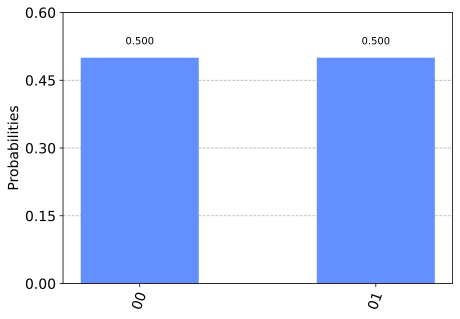

In [114]:
# This gate has a 50% chance of being 00 or 11. And a 0% chance of being 01 or 10
plot_histogram(result.get_counts())